# Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data

# Import The Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read The Data

In [2]:
bank_dataframe = pd.read_csv('/content/drive/MyDrive/Data_For_Analysis/bank .csv')
df = bank_dataframe.copy()
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


# Info & Describe to see information about the data, check duplicate, check missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49732 entries, 0 to 49731
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        49732 non-null  int64 
 1   job        49732 non-null  object
 2   marital    49732 non-null  object
 3   education  49732 non-null  object
 4   default    49732 non-null  object
 5   balance    49732 non-null  int64 
 6   housing    49732 non-null  object
 7   loan       49732 non-null  object
 8   contact    49732 non-null  object
 9   day        49732 non-null  int64 
 10  month      49732 non-null  object
 11  duration   49732 non-null  int64 
 12  campaign   49732 non-null  int64 
 13  pdays      49732 non-null  int64 
 14  previous   49732 non-null  int64 
 15  poutcome   49732 non-null  object
 16  y          49732 non-null  object
dtypes: int64(7), object(10)
memory usage: 6.5+ MB


In [4]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000,49732.000000
mean,40.957472,1367.761562,15.816315,258.690179,2.766549,40.158630,0.576892
std,10.615008,3041.608766,8.315680,257.743149,3.099075,100.127123,2.254838
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1431.000000,21.000000,320.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [5]:
df.duplicated().sum()

4521

# here we will drop duplicate

In [10]:
df.drop_duplicates()
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no


In [11]:
df.duplicated().sum()

0

In [6]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

# insights
# the data is clean and ready, there is no missing data

# then we will use the most useful columns

In [12]:
df.drop(columns=['day','month','duration','campaign','pdays','previous'],inplace=True)
df

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
49727,51,technician,married,tertiary,no,825,no,no,cellular,unknown,yes
49728,71,retired,divorced,primary,no,1729,no,no,cellular,unknown,yes
49729,72,retired,married,secondary,no,5715,no,no,cellular,success,yes
49730,57,blue-collar,married,secondary,no,668,no,no,telephone,unknown,no


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [15]:
# Create a label encoder
le = LabelEncoder()

# Encode categorical features
categorical_features = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'poutcome']
for feature in categorical_features:
  df[feature] = le.fit_transform(df[feature])


In [16]:
df.head(4)

,age,job,marital,education,default,balance,housing,loan,contact,poutcome,y
0,30,10,1,0,0,1787,0,0,0,3,no
1,33,7,1,1,0,4789,1,1,0,0,no
2,35,4,2,2,0,1350,1,0,0,0,no
3,30,4,1,2,0,1476,1,1,2,3,no


In [17]:
df.describe()

,age,job,marital,education,default,balance,housing,loan,contact,poutcome
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,4.339762,1.167725,1.224813,0.018027,1362.272058,0.555838,0.160226,0.640242,2.559974
std,10.618762,3.272657,0.608230,0.747997,0.133049,3044.765829,0.496878,0.366820,0.897951,0.989059
min,18.000000,0.000000,0.000000,0.000000,0.000000,-8019.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,1.000000,1.000000,1.000000,0.000000,72.000000,0.000000,0.000000,0.000000,3.000000
50%,39.000000,4.000000,1.000000,1.000000,0.000000,448.000000,1.000000,0.000000,0.000000,3.000000
75%,48.000000,7.000000,2.000000,2.000000,0.000000,1428.000000,1.000000,0.000000,2.000000,3.000000
max,95.000000,11.000000,2.000000,3.000000,1.000000,102127.000000,1.000000,1.000000,2.000000,3.000000


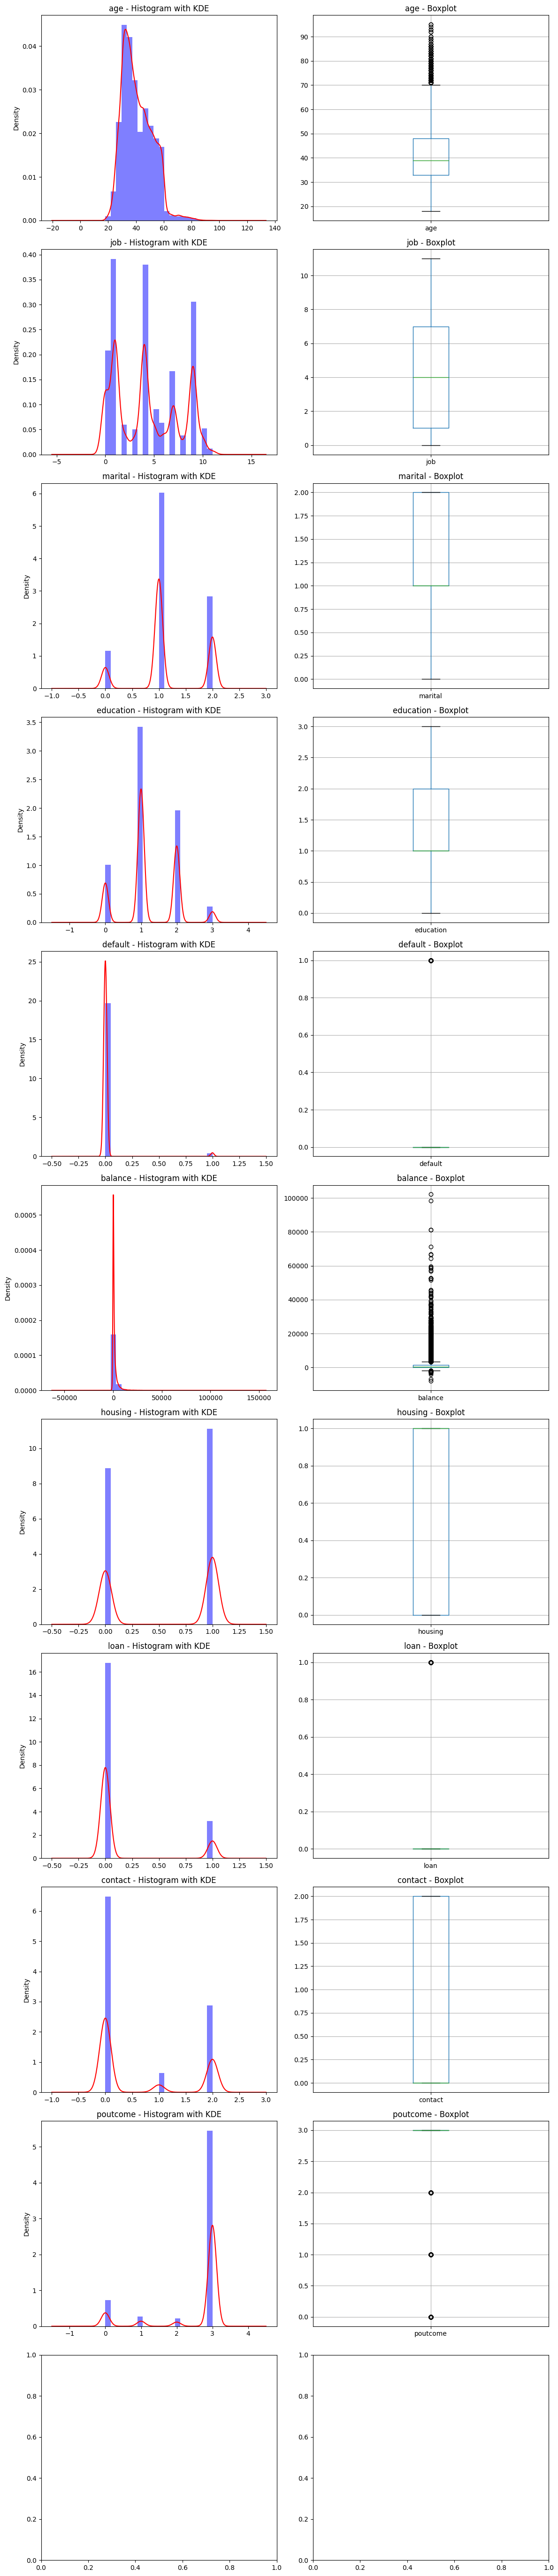

In [19]:
# Plotting Histogram with KDE and Boxplot for each numerical feature
fig, axes = plt.subplots(len(df.columns), 2, figsize=(12, 5 * len(df.columns)))
# categorical_features = ['age','job', 'marital', 'education', 'default','balance', 'housing', 'loan', 'contact', 'poutcome']
for i, col in enumerate(df[['age','job', 'marital', 'education', 'default','balance', 'housing', 'loan', 'contact', 'poutcome']]):
    # Histogram with KDE
    df[col].plot(kind='hist', density=True, ax=axes[i, 0], bins=20, alpha=0.5, color='blue')
    df[col].plot(kind='kde', ax=axes[i, 0], color='red')
    axes[i, 0].set_title(f'{col} - Histogram with KDE')

    # Boxplot
    df.boxplot(column=col, ax=axes[i, 1])
    axes[i, 1].set_title(f'{col} - Boxplot')

plt.tight_layout()
plt.show()

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Separate features and target
X = df.drop('y', axis=1)  # Features
y = df['y']  # Target variable (purchase decision)

# Create a standard scaler
scaler = MinMaxScaler()

# Scale all features except the target
X_scaled = scaler.fit_transform(X)

In [23]:
X_scaled

array([[0.15584416, 0.90909091, 0.5       , ..., 0.        , 0.        ,
        1.        ],
       [0.19480519, 0.63636364, 0.5       , ..., 1.        , 0.        ,
        0.        ],
       [0.22077922, 0.36363636, 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.7012987 , 0.45454545, 0.5       , ..., 0.        , 0.        ,
        0.66666667],
       [0.50649351, 0.09090909, 0.5       , ..., 0.        , 0.5       ,
        1.        ],
       [0.24675325, 0.18181818, 0.5       , ..., 0.        , 0.        ,
        0.33333333]])

In [24]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled if 'X_scaled' in locals() else X, y, test_size=0.2, random_state=42)  # Adjust test_size as needed

# Create the decision tree classifier
clf = DecisionTreeClassifier()

# Train the model
clf.fit(X_train, y_train)


DecisionTreeClassifier()

In [37]:
from sklearn.metrics import accuracy_score

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")


Accuracy: 0.8194


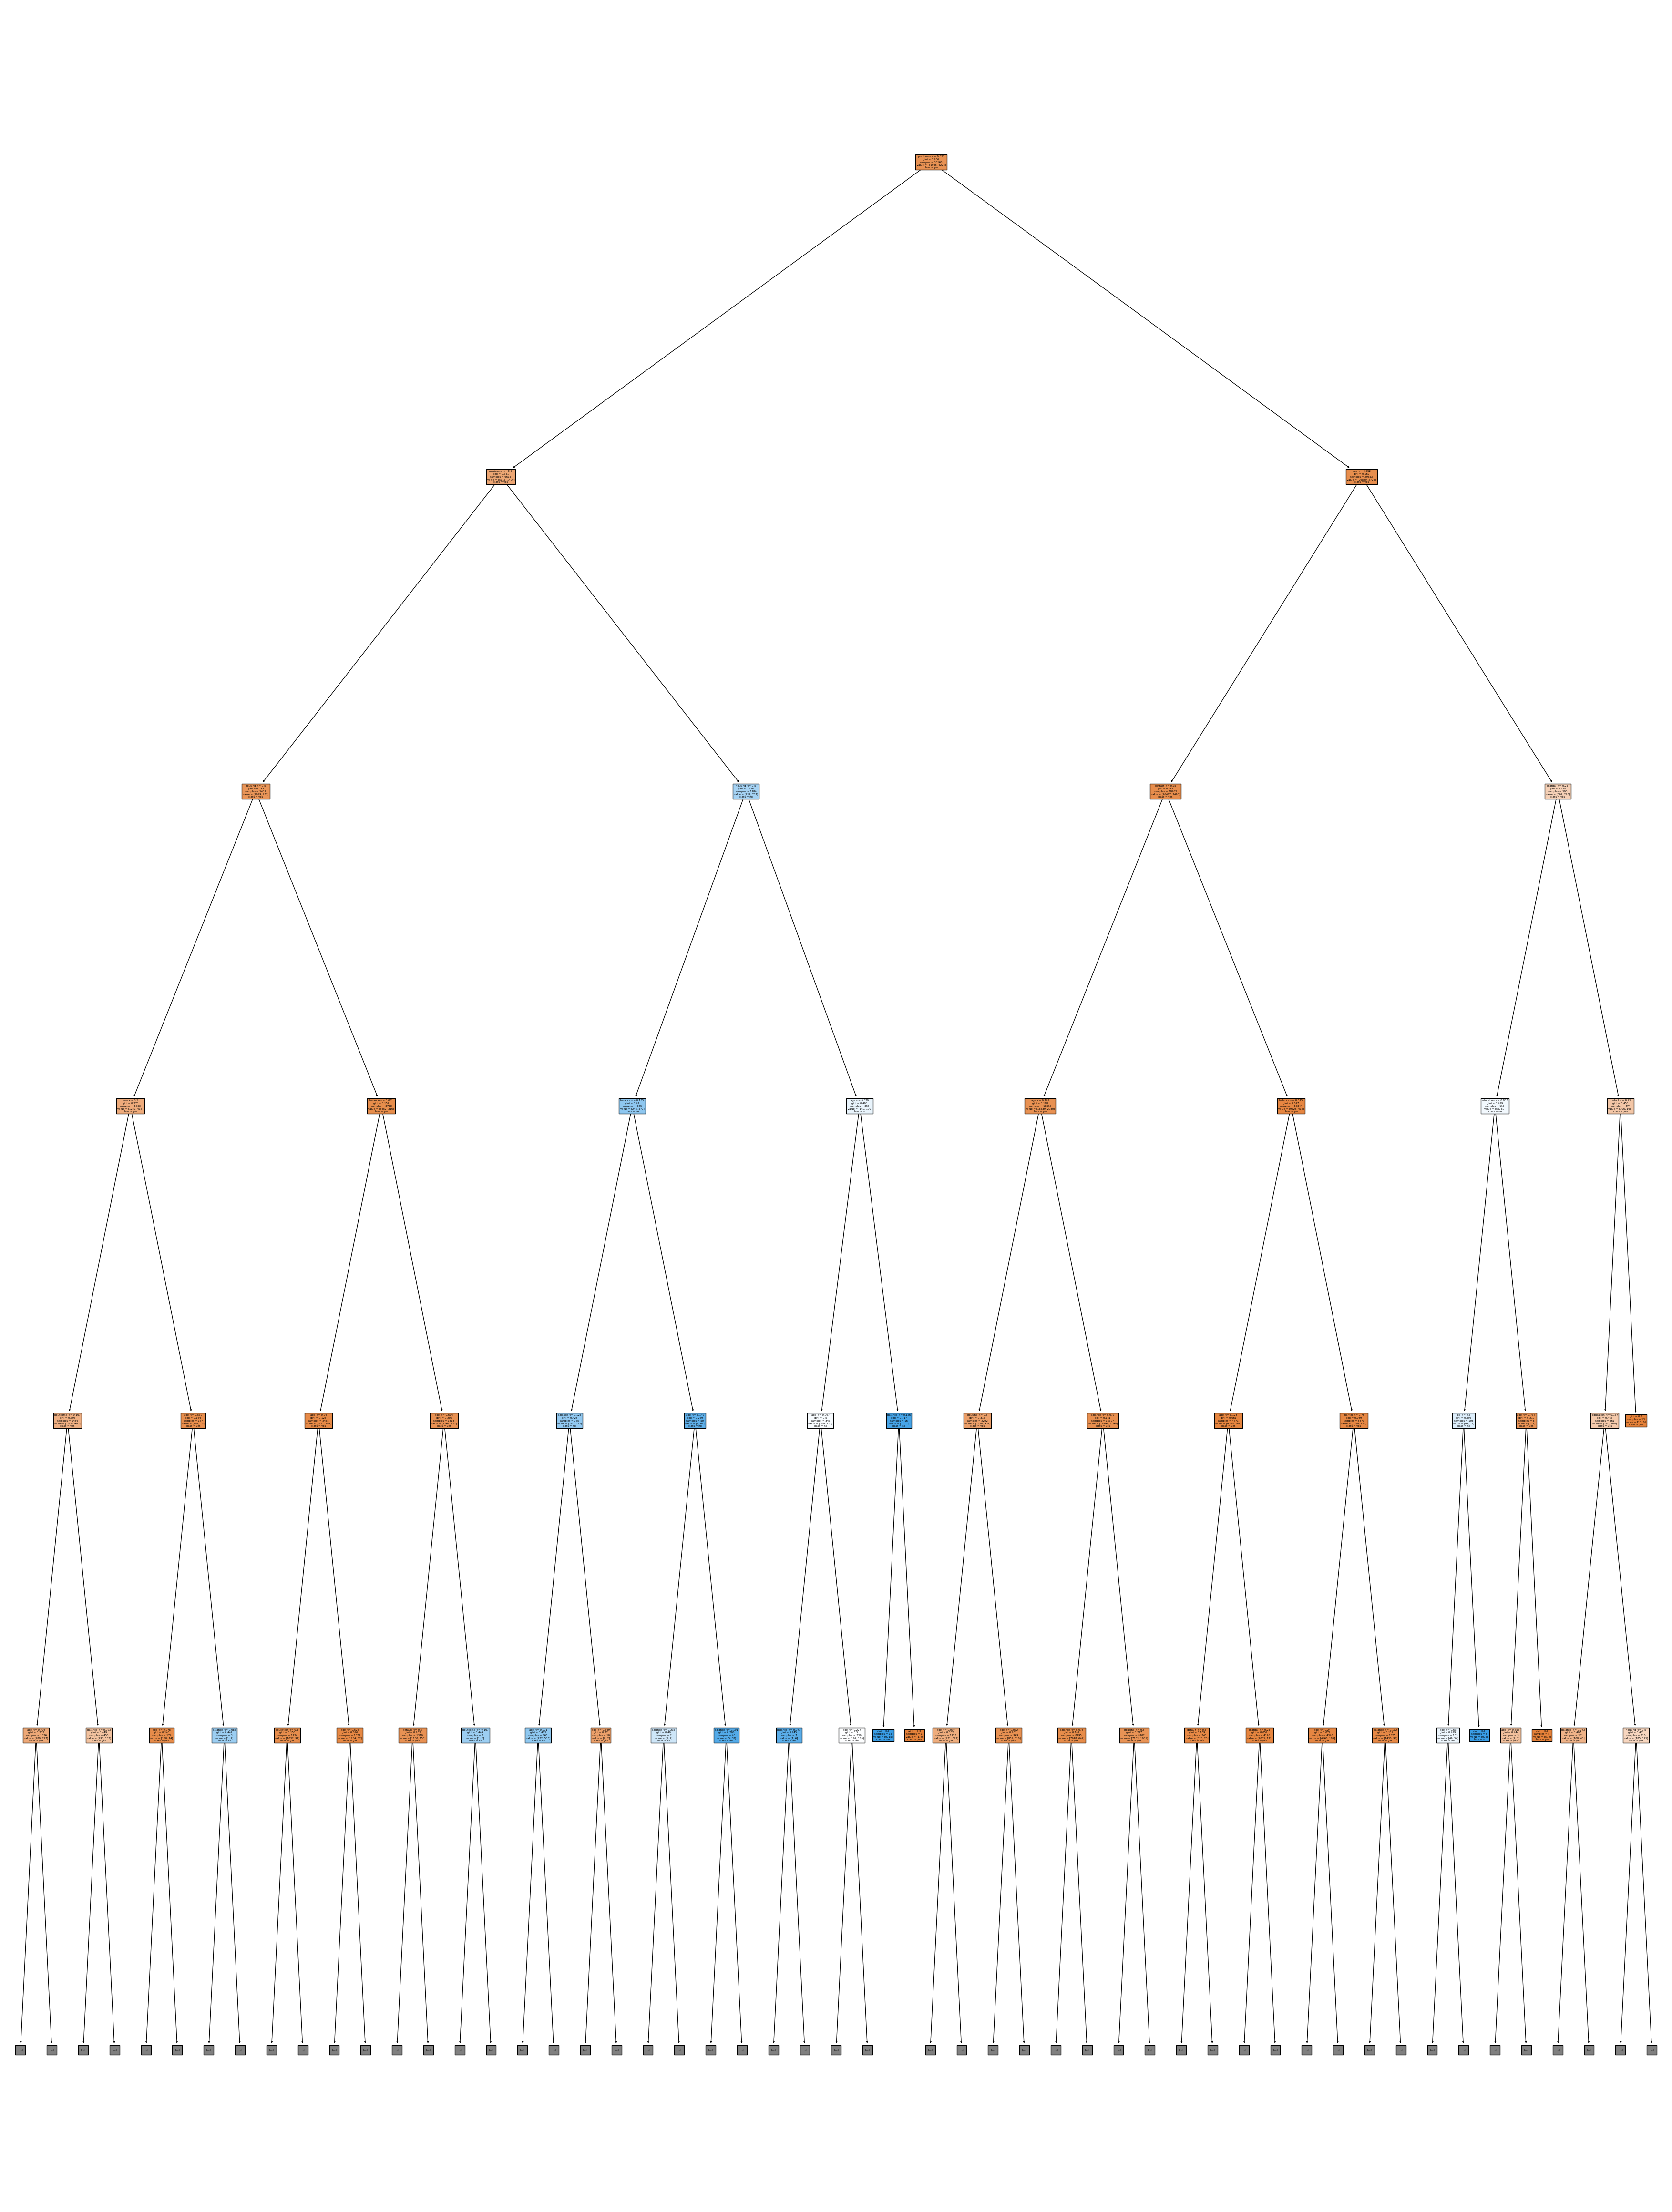

In [38]:
from sklearn import tree
# Use the trained model for visualization
plt.figure(figsize=(45, 60))  # Adjust figure size as needed
tree.plot_tree(clf, max_depth=5, feature_names=X.columns, class_names=['yes', 'no'], filled=True)
plt.show()
